## Attention is all you need
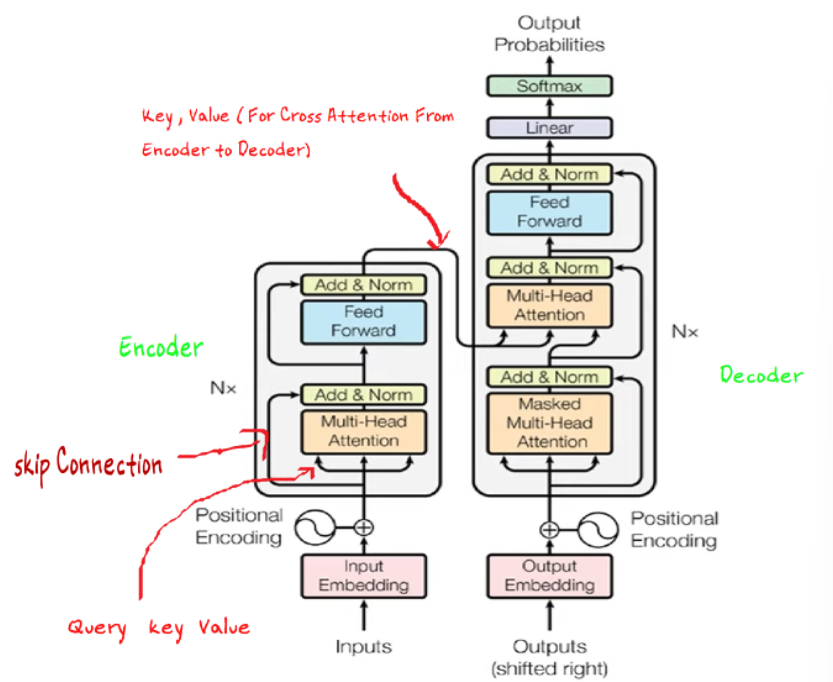

## Rather than RNN, in Transfomer we can feed input simultaneosly 
+  RNN and LSTM can be used for generating seq to seq model
+  LSTM has architecture for Long-Short term memory but it is still slower than RNN it requires huge time to train
+  But Transfomers are faster and it requires Large amount of data for better training.

## Attention in Transfomers

## Self-Attention: The Spotlight Within a Sentence

Self-attention, also known as scaled dot-product attention, is a powerful mechanism that fuels the Transformer architecture. It allows the model to dynamically focus on specific parts of a sentence when processing a particular word. Imagine a spotlight illuminating different sections of a sentence as the model analyzes each word in turn. This fine-tuned focus enables the model to capture intricate relationships and dependencies between words.

### Decoding the Dance of Attention

The self-attention mechanism can be broken down into several key steps:

1. **Query, Key, and Value**: For each word in the sentence, the model creates three vectors:
    - **Query (Q)**: This vector represents the current word's specific "information needs." It's like the spotlight asking, "What information is relevant to me?"
    - **Key (K)**: Each word in the sentence also has a Key vector. This vector captures the essence of the word and its potential relevance to the Query. Think of it as each word holding up a sign that says, "This is what I'm about!"
    - **Value (V)**: Finally, each word has a Value vector, which holds the actual information the word carries. It's like the content illuminated by the spotlight.

These vectors, Query, Key, and Value, are all learned by the model during its training process.

2. **Attention Scores**: To determine how much focus each word in the sentence deserves, the model calculates an attention score for every word. This score is computed by taking the dot product of the current word's Query vector with the Key vector of each word in the sequence. A higher score indicates a stronger potential connection between the current word and the other word.

3. **Softmax and Scaling**: The raw attention scores are transformed into a probability distribution using the softmax function. This ensures that the scores add up to 1, acting as weights for the Value vectors. Essentially, the model decides how much weight to give to each word's information based on its relevance to the current word.

4. **Weighted Sum**: Finally, the Value vectors for all words are weighted by their corresponding attention scores and then summed together. This weighted sum creates a refined representation of the current word, incorporating information from relevant parts of the sentence as determined by the self-attention mechanism.




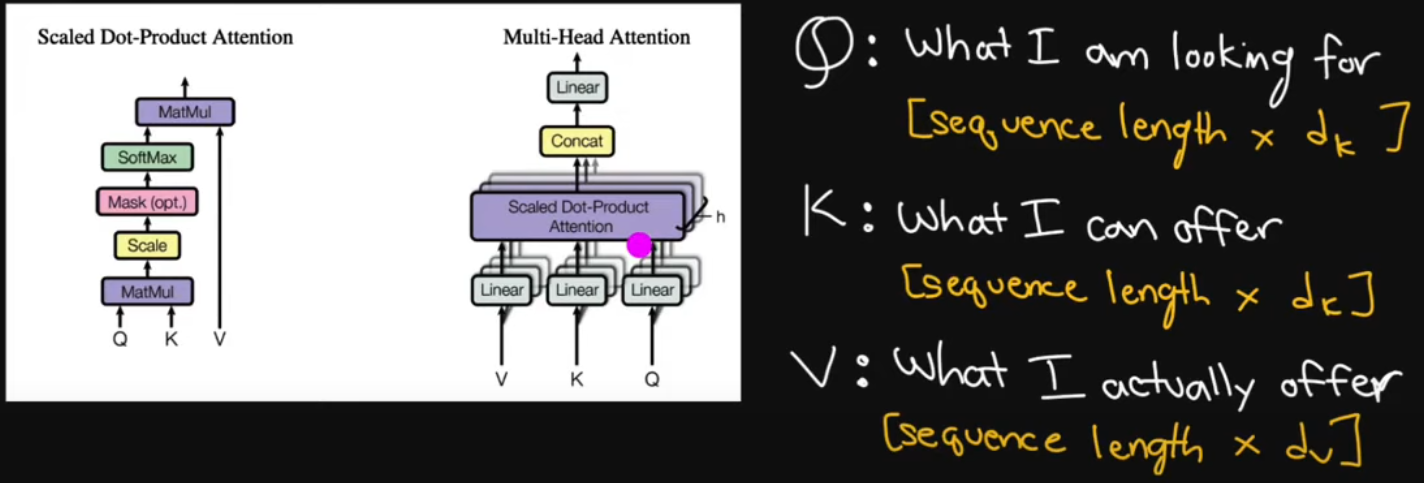



## How Transfomer Handles Variable Length
> <I> The full transformer architecture does not support variable input length inherently. What it is done in practice is to provide a maximum input length and use padding if your sequence is smaller than maximum length or use truncation if your sequence is bigger.
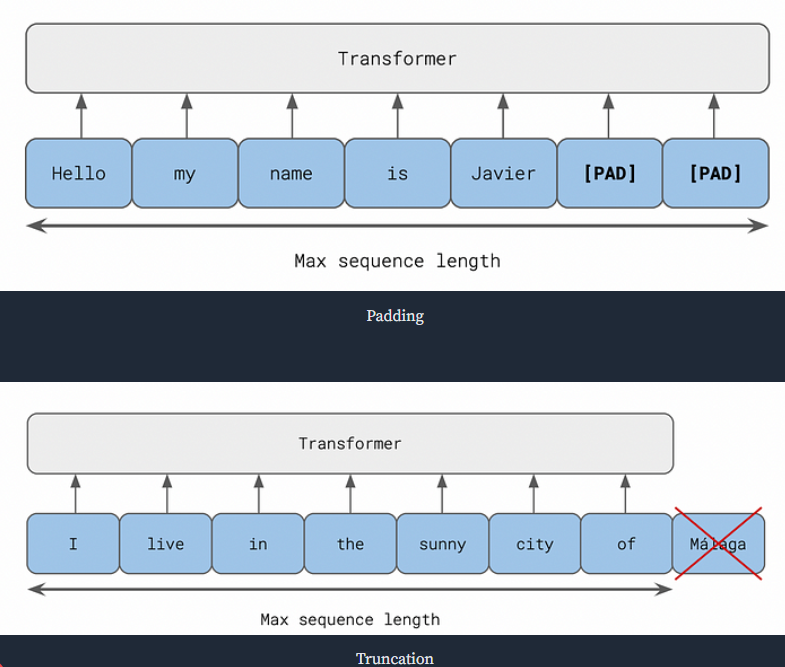



+ <h3> input X (Sequnce of Words)</h3>

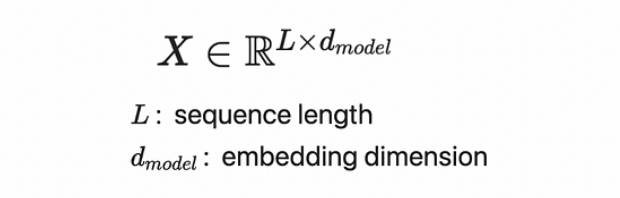
+ <h3> Query,Key,Value </h3>

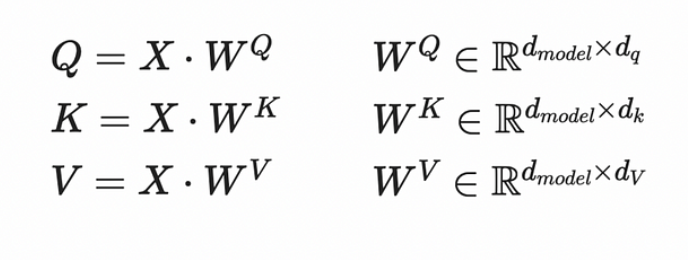
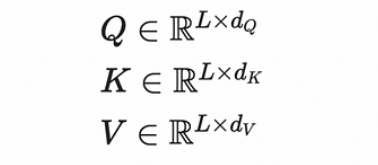

+ <h2> The Attention Formula</h2>

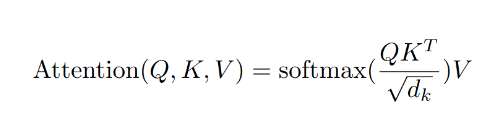

+ <I>As the above formula suggests For attetion We need to multlpy  the Query Matrix with the key matrix so both Must Have the Same Dimention Means d_key == d_query</I>

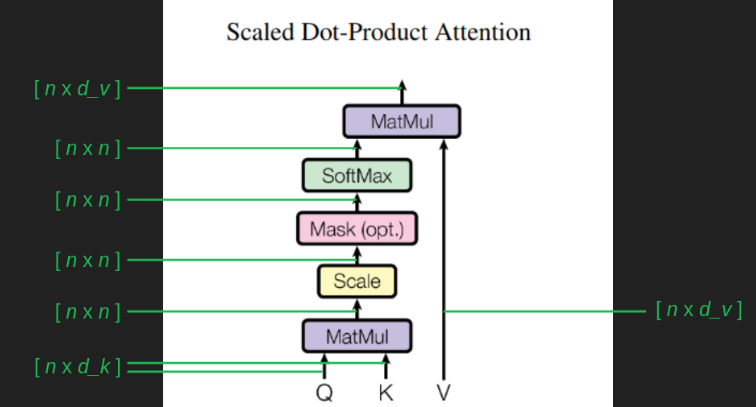

+ <b> L or n </b> : Max Sequnce Length (input length)
+ <b> d_model </b>: Embedding Dimensions of a Word
+ <b> d_k == d_q </b> : Query And key Length
+ <b> d_v </b> : Value Length

In [115]:
import numpy as np
import math

sentence = "The quick brown fox"
# L or n : Max Sequnce Length (input length)
# d_model : Embedding Dimensions of the word
# d_k : Query And key Length 
# d_v : Value Length 

d_model = 3 # Embedding of each word
L = 5 # max input length 
d_k = d_q = 6 # query and key lenth for each word
d_v = 4 # Value Lenth of Each word

In [116]:
# Legth_with_padding_or_truncation 
Length = min(L,len(sentence.split())) # trucation if applicable
Length = max(L,Length) # padding


X = np.random.randn(Length,d_model) 
X # will be Lxd_model vector 
print(X)
print(X.shape)

[[-0.04690987 -0.77302922 -1.06119804]
 [ 0.76930145 -0.22232808  1.99366491]
 [-0.54607898 -0.27093022  0.91976017]
 [ 0.7874593   0.63359801 -0.35197071]
 [-0.53770141 -2.33921686 -0.92770174]]
(5, 3)


> <i> In the Above example sentance length is 10 but we got a (12,4) input which is sign that input has been padded </i>

In [117]:
Q = np.random.randn(L,d_k)
K = np.random.randn(L,d_k)
V = np.random.randn(L,d_v)
print("Q",Q.shape)
print("K",K.shape)
print("V",V.shape)

Q (5, 6)
K (5, 6)
V (5, 4)


In [118]:
QxKt = np.matmul(Q,K.T)
QxKt.shape ## (L,L)

(5, 5)

In [119]:
# Variance of each query key and value
Q.var(),K.var(),QxKt.var()

(0.9266571071970269, 0.6493538356781698, 4.454200770243143)

+ <i> As we can se variance after Q x K.T it has been significantly increased </i>
+ <i> thats why we divide them by sqrt(d_k) for reducing the variance </i>

In [120]:
scaled = np.matmul(Q,K.T) / math.sqrt(d_k)
Q.var(), K.var(),scaled.var()

(0.9266571071970269, 0.6493538356781698, 0.742366795040524)

## Making in Decoder Attetion Mechanisam

+ This is to ensure words don't get context from words generated in the future.
+ Masking in Not required in the decoder.

In [121]:
mask = np.tril(np.ones((L,L)))
mask

array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.]])

In [122]:
mask [mask==0] = -np.infty
mask [mask==1.0] = 0
mask

array([[  0., -inf, -inf, -inf, -inf],
       [  0.,   0., -inf, -inf, -inf],
       [  0.,   0.,   0., -inf, -inf],
       [  0.,   0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.,   0.]])

In [123]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x),axis=-1)

In [124]:
# Attention in Encoder
attention = softmax(scaled)
print(attention)
attention.shape

[[0.16064648 0.62594815 0.16385482 0.10047034 0.05924154]
 [0.21157888 0.42724548 0.24059574 0.02716185 0.03404166]
 [0.06677266 0.04651031 0.4050642  0.09156362 0.03483   ]
 [0.19326639 1.02356199 0.19504027 0.17553727 0.08288961]
 [0.12503076 0.06002314 0.58433419 0.45501763 0.4026364 ]]


(5, 5)

In [125]:
## Attention in Decoder
attention_dec = softmax(scaled+mask)
print(attention_dec)
attention_dec.shape

[[1.         0.         0.         0.         0.        ]
 [1.31704649 0.61050187 0.         0.         0.        ]
 [0.41564966 0.06645976 0.67219956 0.         0.        ]
 [1.20305402 1.46259359 0.32366716 0.19649439 0.        ]
 [0.77829754 0.08576858 0.96969612 0.50934148 0.4026364 ]]


(5, 5)

+ <i>As we can in see in the attention of Decoder
  For the attetion of tje first word will be full on the word it self
  After Generating the Second word Attention changes to that two word</i>

In [129]:
# the new embedding of the sentance will be
new_emb = np.matmul(attention_dec,V)
print(new_emb.shape) # (L,d_v)
print("new_emb\n",new_emb)
print("Old_v\n",V) 

(5, 4)
new_emb
 [[-0.98092054 -0.73034605  0.45452765 -1.92504871]
 [-0.90252003 -1.96578122  1.05436779 -3.18850087]
 [-0.37764201 -0.72426605  1.31280933 -1.38371994]
 [-0.22494408 -3.10561786  2.28587905 -4.07536975]
 [-1.94646175 -0.25900542  2.32929576 -2.35233445]]
Old_v
 [[-0.98092054 -0.73034605  0.45452765 -1.92504871]
 [ 0.63783247 -1.64435454  0.74649035 -1.06981202]
 [-0.01831735 -0.46327693  1.59814669 -0.76238467]
 [ 0.14349189  1.66924783  0.66148522  0.26477556]
 [-3.21144292  0.12287949  0.06177806 -0.39215839]]


+ <i>The above new embadding are caluclated with the Decoder which has Maked attetion</i>
+ <i>We see that the new_emd of first word is same as old value of the first word
  . Mean it has full attention on it self . After words it changes according depending upon the context of the sentence  </i>

## Sumning UP

In [132]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x,axis=-1))

def scaled_dot_product_attention(q,k,v,Mask=None):
    d_k = q.shape[-1]
    scaled = np.matmul(q,k.T)/math.sqrt(d_k)
    if mask is None:
        scaled += mask
    attention = softmax(scaled)
    out = np.dot(attention,v)
    return out,attention

In [133]:
values,attention = sacled_dot_product_attention(Q,K,V,mask=None)
print("Q\n",Q)
print("K\n",K)
print("V\n",V)
print("New Values\n",values)
print("Attention",attention)

NameError: name 'sacled_dot_product_attention' is not defined